## Scraping Data

In [26]:
# import json

# with open('new_all_qguide_data.html', 'r') as file:
#     json_data = json.load(file)

# with open('new_all_qguide_data.json', 'w') as file:
#     json.dump(json_data, file, separators=(',', ':'))


In [37]:
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests
# from tabulate import tabulate

# def extract_table_data(url):
#     # Fetch the HTML content from the URL
#     response = requests.get(url)
#     html = response.text

#     # Parse the HTML
#     soup = BeautifulSoup(html, 'html.parser')

#     # Define table names
#     table_names = ['Responses', 'General', 'Instructor', 'Hours', 'Recommendation', 'Recommendation_stats', 'Reasons', 'Will_tochange', 'Open_mind', 'Comments']

#     # Find all tables containing the required data
#     tables = soup.find_all('table')

#     # Create a dictionary to store DataFrames for each table
#     dataframes = {}

#     # Iterate through each table
#     for idx, table in enumerate(tables):
#         # Extract headers
#         headers = []
#         for th in table.find('tr').find_all('th'):
#             headers.append(th.text.strip())

#         # Extract data rows
#         data = []
#         for row in table.find_all('tr'):
#             row_data = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
#             if len(row_data) == len(headers):
#                 data.append(row_data)

#         # If data rows exist
#         if len(data) > 1:
#             # Create a DataFrame excluding the header row
#             df = pd.DataFrame(data[1:], columns=headers)
#             dataframes[table_names[idx]] = df

#     return dataframes


## Scraping table data from each course-specific url

In [59]:
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests

# def extract_table_data(url):
#     response = requests.get(url)
#     html = response.text

#     soup = BeautifulSoup(html, 'html.parser')

#     # THIS PROBABLY IS BAD LONG-TERM BUT I"M FUCKING ANNOYED
#     captions_to_skip = [
#         "Table for [QTitle]-In this course, most students listen attentively with an open mind and a willingness to change their point of view as they learn more about the topic.-Statistics.",
#         "Table for [QTitle]-In this course (including sections), I feel comfortable expressing my views on controversial topics.-Statistics.",
#         "Table for [qtitle]-in this course, most students listen attentively with an open mind and a willingness to change their point of view as they learn more about the topic..",
#         "Table for [qtitle]-in this course (including sections), i feel comfortable expressing my views on controversial topics..",
#         "Table for [qtitle]-in this course, most students listen attentively with an open mind and a willingness to change their point of view as they learn more about the topic..",
#     ]

#     captions_to_skip = [caption.lower().strip() for caption in captions_to_skip]

#     tables = soup.find_all('table')

#     dataframes = {}

#     table_index = 0

#     for table in tables:
#         caption_tag = table.find('caption')
        
#         if caption_tag:
#             caption_text = caption_tag.text.strip().lower()
            
#             if any(skip_caption in caption_text for skip_caption in captions_to_skip):
#                 continue

#         headers = [th.text.strip() for th in table.find('tr').find_all('th')]

#         data = []
#         for row in table.find_all('tr'):
#             row_data = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
#             if len(row_data) == len(headers):
#                 data.append(row_data)

#         if len(data) > 1:
#             df = pd.DataFrame(data[1:], columns=headers)
#             dataframes[f'Table_{table_index}'] = df
#             table_index += 1

#     return dataframes


## Example usage (printing out table data)

In [60]:
# # Example usage:
# url = "https://harvard.bluera.com/harvard/rpv-eng.aspx?lang=eng&redi=1&SelectedIDforPrint=2a25bbb354dd26d2a5018145b3eccac802438e93cb86651665bfd7dc8f5e8b888dcf958e60eb641327093338906fe195&ReportType=2&regl=en-US"
# tables_data = extract_table_data(url)

# # Print each table with its name
# for table_name, table_df in tables_data.items():
#     print(f"Table '{table_name}':")
#     print(tabulate(table_df, headers='keys', tablefmt='grid'))
#     print()

Table 'Table_0':
+----+----------------+------------+
|    | Raters         | Students   |
+====+================+============+
|  0 | Responded      | 5          |
+----+----------------+------------+
|  1 | Invited        | 7          |
+----+----------------+------------+
|  2 | Response Ratio | 71%        |
+----+----------------+------------+

Table 'Table_1':
+----+--------------------------------------------------------------------------------------------+---------+-------------+-------------+--------+--------+------------------+---------------+------------+
|    |                                                                                            |   Count | Excellent   | Very Good   | Good   | Fair   | Unsatisfactory   |   Course Mean |   FAS Mean |
+====+============================================================================================+=========+=============+=============+========+========+==================+===============+============+
|  0 | Evaluate the 

## Turning table data into json data (takes the longest)

In [64]:
# import json
# import time

# with open('new_all_qguide_data.json', 'r') as f:
#     all_qguide_data = json.load(f)

# course_data_list = []

# start_time = time.time()

# total_entries = len(all_qguide_data['data'])

# processed_entries = 0

# for entry in all_qguide_data['data']:
#     iteration_start_time = time.time()

#     course_data = {}
#     for key in ['title', 'url', 'instructor', 'department', 'term', 'subject', 'blueCourseId']:
#         if key in entry:
#             course_data[key.capitalize()] = entry[key]
#         # else:
#         #     # If blueCourseId is missing, assign 0
#         #     if key == 'blueCourseId':
#         #         course_data['Bluecourseid'] = "POST-SPRING2024"

#     tables_data = extract_table_data(entry['url'])

#     tables_data_dict = {table_name: table_df.to_dict(orient='records') for table_name, table_df in tables_data.items()}

#     course_data['Feedback'] = tables_data_dict

#     course_data_list.append(course_data)

#     processed_entries += 1

#     iteration_elapsed_time = time.time() - iteration_start_time

#     percent_finished = (processed_entries / total_entries) * 100

#     avg_time_per_iteration = (time.time() - start_time) / processed_entries

#     remaining_entries = total_entries - processed_entries
#     remaining_time_seconds = remaining_entries * avg_time_per_iteration

#     hours = int(remaining_time_seconds // 3600)
#     remaining_time_seconds %= 3600
#     minutes = int(remaining_time_seconds // 60)
#     seconds = int(remaining_time_seconds % 60)

#     print(f"Iteration {processed_entries}/{total_entries} - {percent_finished:.2f}% completed - Time taken: {iteration_elapsed_time:.2f}s - Estimated time remaining: {hours}h {minutes}m {seconds}s")

# end_time = time.time()

# with open('new_course_data.json', 'w') as json_file:
#     json.dump(course_data_list, json_file, indent=4)


Iteration 1/9372 - 0.01% completed - Time taken: 0.62s - Estimated time remaining: 1h 36m 29s
Iteration 2/9372 - 0.02% completed - Time taken: 0.31s - Estimated time remaining: 1h 12m 33s
Iteration 3/9372 - 0.03% completed - Time taken: 0.21s - Estimated time remaining: 0h 59m 24s
Iteration 4/9372 - 0.04% completed - Time taken: 0.43s - Estimated time remaining: 1h 1m 22s
Iteration 5/9372 - 0.05% completed - Time taken: 0.19s - Estimated time remaining: 0h 55m 7s
Iteration 6/9372 - 0.06% completed - Time taken: 0.36s - Estimated time remaining: 0h 55m 16s
Iteration 7/9372 - 0.07% completed - Time taken: 0.39s - Estimated time remaining: 0h 56m 1s
Iteration 8/9372 - 0.09% completed - Time taken: 0.22s - Estimated time remaining: 0h 53m 16s
Iteration 9/9372 - 0.10% completed - Time taken: 0.39s - Estimated time remaining: 0h 54m 9s
Iteration 10/9372 - 0.11% completed - Time taken: 0.43s - Estimated time remaining: 0h 55m 28s
Iteration 11/9372 - 0.12% completed - Time taken: 0.21s - Estim

## Merge old data (no longer public) with newer, 23-24 data

In [65]:
# import json

# def add_unique_courses(json1, json2):
#     # Create a set of Bluecourseid from the first JSON to keep track of added courses
#     existing_course_ids = {course['Bluecourseid'] for course in json1}
    
#     # Loop through the second JSON and add courses that don't exist in the first
#     for course in json2:
#         if course['Bluecourseid'] not in existing_course_ids:
#             json1.append(course)  # Add the new course to the first JSON
    
#     return json1

# # Load JSON data from files
# with open('course_data.json', 'r') as file1:
#     json1 = json.load(file1)

# with open('new_course_data.json', 'r') as file2:
#     json2 = json.load(file2)

# # Add unique courses from json2 to json1
# combined_json = add_unique_courses(json1, json2)

# # Save the combined JSON array
# with open('2020-2024_Course_Data.json', 'w') as outfile:
#     json.dump(combined_json, outfile, indent=4)


## Looking at the shape of our data

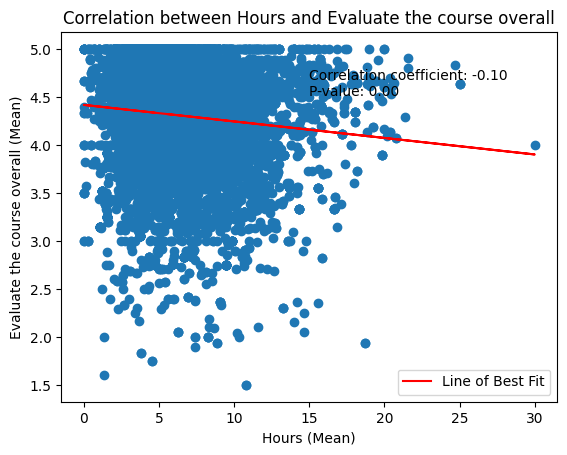

In [67]:
# import json
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

# # Load the JSON data
# with open('2020-2024_Course_Data.json', 'r') as file:
#     data = json.load(file)

# # Initialize lists to store hours and overall evaluation ratings
# hours = []
# course_scores = []

# # Iterate through each entry in the data
# for entry in data:
#     # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'General' keys
#     if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'General' in entry['Feedback']:
#         # Extract hours and overall evaluation rating
#         hours_data = entry['Feedback']['Hours']
#         overall_data = entry['Feedback']['General'][0]

#         # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
#         if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
#             # Convert hours value to float and append to the list
#             hours.append(float(hours_data[2]['Value']))
#         else:
#             # Handle missing or invalid hours data
#             hours.append(np.nan)

#         # Convert overall evaluation rating to float and append to the list
#         course_scores.append(float(overall_data['Course Mean']))
#     else:
#         # Handle missing 'Feedback', 'Hours', or 'General' keys
#         hours.append(np.nan)
#         course_scores.append(np.nan)

# # Convert lists to numpy arrays for correlation calculation
# hours_array = np.array(hours)
# course_scores_array = np.array(course_scores)

# # Remove NaN values from the arrays
# valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
# hours_array = hours_array[valid_indices]
# course_scores_array = course_scores_array[valid_indices]

# # Calculate the correlation coefficient and p-value
# correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# # Fit a linear regression line
# slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
# line_of_best_fit = slope * hours_array + intercept

# # Plot the data
# plt.scatter(hours_array, course_scores_array)
# plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
# plt.xlabel('Hours (Mean)')
# plt.ylabel('Evaluate the course overall (Mean)')
# plt.title('Correlation between Hours and Evaluate the course overall')
# plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.legend()
# plt.show()

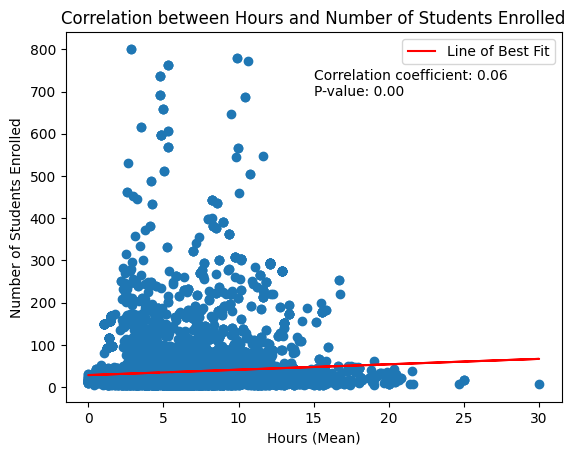

In [68]:
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

# # Load the JSON data
# with open('2020-2024_Course_Data.json', 'r') as file:
#     data = json.load(file)

# # Initialize lists to store hours and overall evaluation ratings
# hours = []
# course_scores = []

# # Iterate through each entry in the data
# for entry in data:
#     # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'Responses' keys
#     if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'Responses' in entry['Feedback']:
#         # Extract hours and overall evaluation rating
#         hours_data = entry['Feedback']['Hours']
#         responses = entry['Feedback']['Responses']

#         # Check if 'Responses' list has at least two elements
#         if len(responses) > 1:
#             # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
#             if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
#                 # Convert hours value to float and append to the list
#                 hours.append(float(hours_data[2]['Value']))

#                 # Convert overall evaluation rating to float and append to the list
#                 course_scores.append(float(responses[1]['Students']))
#             else:
#                 # Handle missing or invalid hours data
#                 hours.append(np.nan)
#                 course_scores.append(np.nan)
#         else:
#             # Handle missing or invalid 'Responses' data
#             hours.append(np.nan)
#             course_scores.append(np.nan)
#     else:
#         # Handle missing 'Feedback', 'Hours', or 'Responses' keys
#         hours.append(np.nan)
#         course_scores.append(np.nan)

# # Convert lists to numpy arrays for correlation calculation
# hours_array = np.array(hours)
# course_scores_array = np.array(course_scores)

# # Remove NaN values from the arrays
# valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
# hours_array = hours_array[valid_indices]
# course_scores_array = course_scores_array[valid_indices]

# # Calculate the correlation coefficient and p-value
# correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# # Fit a linear regression line
# slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
# line_of_best_fit = slope * hours_array + intercept

# # Plot the data
# plt.scatter(hours_array, course_scores_array)
# plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
# plt.xlabel('Hours (Mean)')
# plt.ylabel('Number of Students Enrolled')
# plt.title('Correlation between Hours and Number of Students Enrolled')
# plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.legend()
# plt.show()

## Filtering all course data to just GenEd courses

In [2]:
# import json

# # Load the existing JSON data
# with open('2020-2024_Course_Data.json', 'r') as file:
#     data = json.load(file)

# # Initialize a list to hold the filtered data
# filtered_data = []

# # Iterate through each entry in the data
# for entry in data:
#     # Check if the entry's department is "General Education"
#     if entry.get('Department') == 'General Education':
#         # Add the entry to the filtered data list
#         filtered_data.append(entry)

# # Write the filtered data to a new JSON file
# with open('2020-2024_geneds_only_course_data.json', 'w') as file:
#     json.dump(filtered_data, file, indent=4)

# print(f"Filtered data has been written to '2024_geneds_only_course_data.json'.")


Filtered data has been written to '2024_geneds_only_course_data.json'.


## Visualizations begin here

Statistics Summary for Median Hours:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.469136     5.0   5.0    3.5   
2021 Fall                 54.0  3.805556     4.0   3.0    6.0   
2021 Spring               53.0  3.886792     4.0   3.0    4.0   
2022 Fall                 51.0  3.803922     4.0   3.0    6.0   
2022 Spring               56.0  3.687500     3.0   3.0    5.5   
2023 Fall                 53.0  3.726415     4.0   3.0    5.0   
2023 Spring               37.0  3.513514     4.0   4.0    4.0   
2024 Spring               44.0  3.329545     3.0   3.0    3.5   

             Standard Deviation  
2020 Fall              0.943218  
2021 Fall              1.304624  
2021 Spring            0.953947  
2022 Fall              1.104891  
2022 Spring            1.020528  
2023 Fall              1.076703  
2023 Spring            0.777161  
2024 Spring            1.028338  

Trend Analysis for Median Hours:
Trend (Slope of Regression Line): -0.

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_81608/3617654395.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


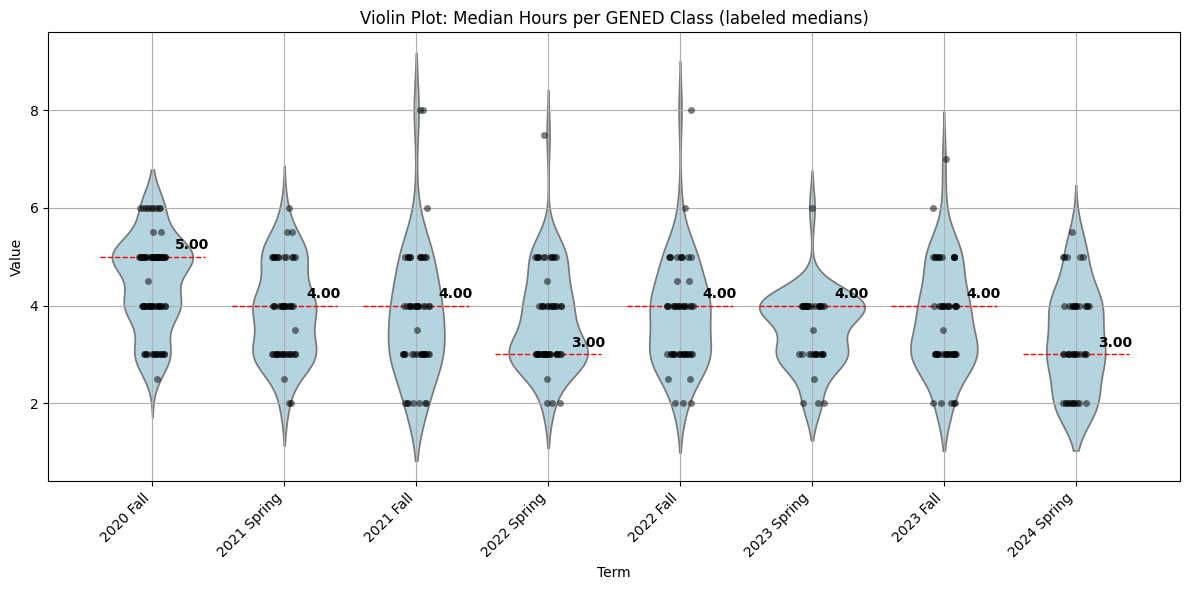

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_81608/3617654395.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


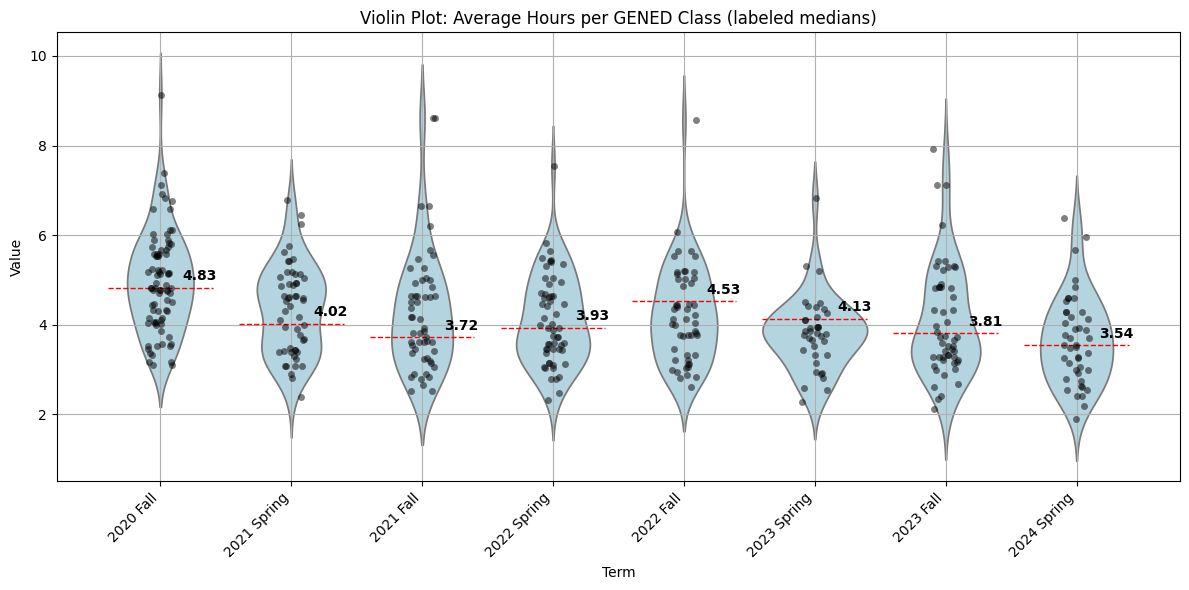

In [1]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_hours_data(json_data):
    median_hours_data = []
    average_hours_data = []

    for course in json_data:
        term = course.get("Term", "")
        feedback = course.get("Feedback", {})

        # Skip 2019 data
        if "2019" in term:
            continue
        
        # Handle different formats of feedback data
        hours_data = feedback.get("Hours", [])
        if not hours_data:
            # Attempt to extract from other table formats if 'Hours' is missing
            hours_data = feedback.get("Table_3", [])  # Modify this based on how hours might appear

        # Extract the median value from the hours data
        median_hours = next((item['Value'] for item in hours_data if item.get('Statistics') == "Median"), None)
        if median_hours:
            median_hours_data.append({'Term': term, 'Value': float(median_hours)})

        # Extract the mean value from the hours data
        average_hours = next((item['Value'] for item in hours_data if item.get('Statistics') == "Mean"), None)
        if average_hours:
            average_hours_data.append({'Term': term, 'Value': float(average_hours)})

    return median_hours_data, average_hours_data


def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def custom_term_sort(term):
    try:
        year, semester = term.split()
        year = int(year)
    except ValueError:
        return (9999, '')
    
    semester_order = {"Spring": 0, "Fall": 1}
    
    return (year, semester_order.get(semester, 2))

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique(), key=custom_term_sort), ordered=True)
    
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    medians = df.groupby('Term')['Value'].median().sort_index()
    y_max = ax.get_ylim()[1]
    
    for i, term in enumerate(df['Term'].unique()):
        median_value = medians[term]
        x_pos = i
        
        if median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            y_offset = 0.1
            x_offset = 0.3
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
median_hours_data, average_hours_data = extract_hours_data(json_data)

# Compute statistics
df_median_hours = pd.DataFrame(median_hours_data)
df_average_hours = pd.DataFrame(average_hours_data)

stats_median_hours = compute_statistics(df_median_hours)
stats_average_hours = compute_statistics(df_average_hours)

# Analyze trends
trend_median_hours, r_value_median_hours, p_value_median_hours = analyze_trend(df_median_hours)
trend_average_hours, r_value_average_hours, p_value_average_hours = analyze_trend(df_average_hours)

# Print statistics and trend analysis
print("Statistics Summary for Median Hours:")
print(stats_median_hours)
print("\nTrend Analysis for Median Hours:")
print(f"Trend (Slope of Regression Line): {trend_median_hours:.2f}")
print(f"R-squared: {r_value_median_hours:.2f}")
print(f"P-value: {p_value_median_hours:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value_median_hours < 0.05 else 'No'}")

print("\nStatistics Summary for Average Hours:")
print(stats_average_hours)
print("\nTrend Analysis for Average Hours:")
print(f"Trend (Slope of Regression Line): {trend_average_hours:.2f}")
print(f"R-squared: {r_value_average_hours:.2f}")
print(f"P-value: {p_value_average_hours:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value_average_hours < 0.05 else 'No'}")

median_terms = [entry['Term'] for entry in median_hours_data]
average_terms = [entry['Term'] for entry in average_hours_data]

print("Terms in Median Data:", set(median_terms))
print("Terms in Average Data:", set(average_terms))

# Plot the graphics
plot_violin_plot(median_hours_data, 'Median Hours per GENED Class (labeled medians)')
plot_violin_plot(average_hours_data, 'Average Hours per GENED Class (labeled medians)')

Statistics Summary for Median Hours:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.469136     5.0   5.0    3.5   
2021 Fall                 54.0  3.805556     4.0   3.0    6.0   
2021 Spring               53.0  3.886792     4.0   3.0    4.0   
2022 Fall                 51.0  3.803922     4.0   3.0    6.0   
2022 Spring               56.0  3.687500     3.0   3.0    5.5   
2023 Fall                 53.0  3.726415     4.0   3.0    5.0   
2023 Spring               37.0  3.513514     4.0   4.0    4.0   
2024 Spring               44.0  3.329545     3.0   3.0    3.5   

             Standard Deviation  
2020 Fall              0.943218  
2021 Fall              1.304624  
2021 Spring            0.953947  
2022 Fall              1.104891  
2022 Spring            1.020528  
2023 Fall              1.076703  
2023 Spring            0.777161  
2024 Spring            1.028338  

Trend Analysis for Median Hours:
Trend (Slope of Regression Line): -0.

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/2985790864.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


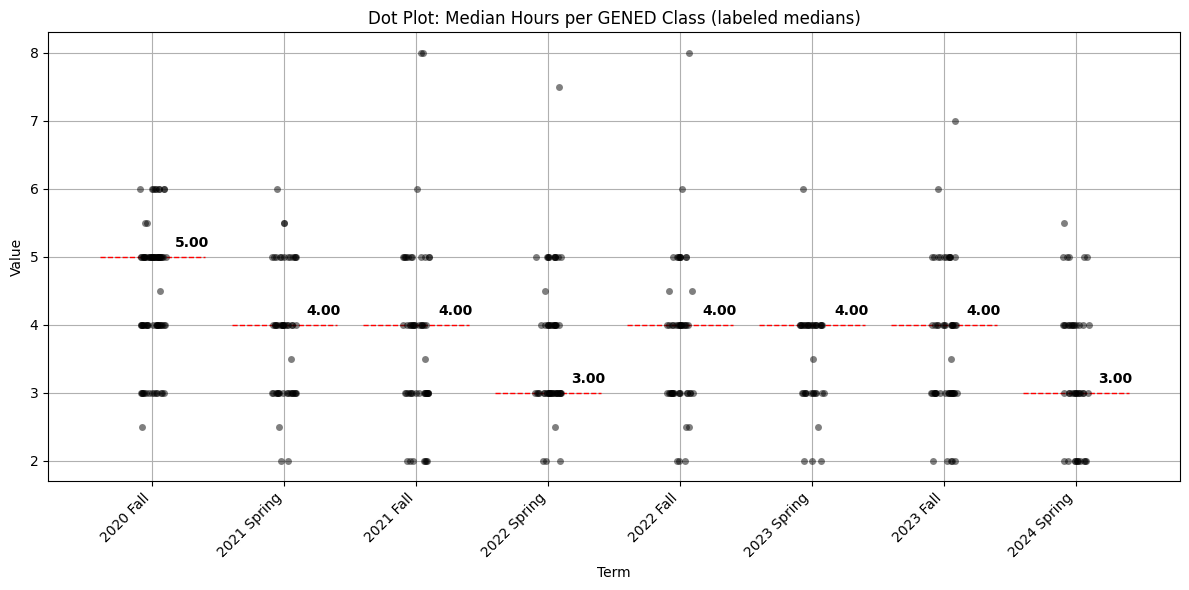

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/2985790864.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


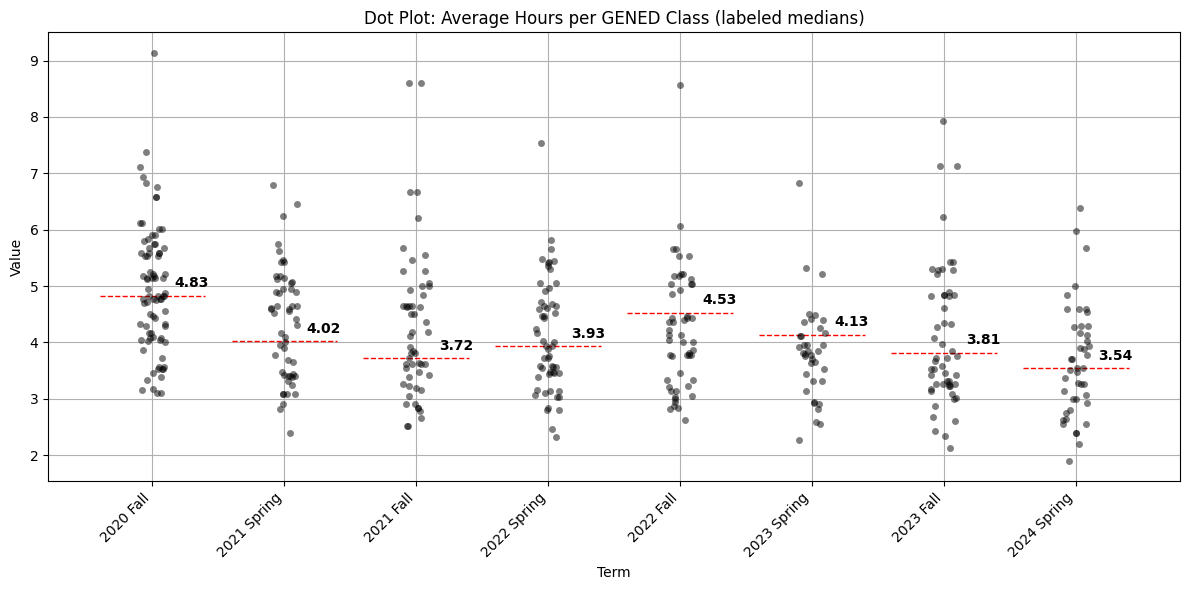

In [35]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_hours_data(json_data):
    median_hours_data = []
    average_hours_data = []

    for course in json_data:
        term = course.get("Term", "")
        feedback = course.get("Feedback", {})

        # Skip 2019 data
        if "2019" in term:
            continue
        
        # Handle different formats of feedback data
        hours_data = feedback.get("Hours", [])
        if not hours_data:
            # Attempt to extract from other table formats if 'Hours' is missing
            hours_data = feedback.get("Table_3", [])  # Modify this based on how hours might appear

        # Extract the median value from the hours data
        median_hours = next((item['Value'] for item in hours_data if item.get('Statistics') == "Median"), None)
        if median_hours:
            median_hours_data.append({'Term': term, 'Value': float(median_hours)})

        # Extract the mean value from the hours data
        average_hours = next((item['Value'] for item in hours_data if item.get('Statistics') == "Mean"), None)
        if average_hours:
            average_hours_data.append({'Term': term, 'Value': float(average_hours)})

    return median_hours_data, average_hours_data

def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def custom_term_sort(term):
    try:
        year, semester = term.split()
        year = int(year)
    except ValueError:
        return (9999, '')
    
    semester_order = {"Spring": 0, "Fall": 1}
    
    return (year, semester_order.get(semester, 2))

def plot_dot_plot(data, title):
    df = pd.DataFrame(data)
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique(), key=custom_term_sort), ordered=True)

    plt.figure(figsize=(12, 6))
    ax = sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)

    medians = df.groupby('Term')['Value'].median().sort_index()
    y_max = ax.get_ylim()[1]
    
    for i, term in enumerate(df['Term'].unique()):
        median_value = medians[term]
        x_pos = i
        
        if median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            y_offset = 0.1
            x_offset = 0.3
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Dot Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
median_hours_data, average_hours_data = extract_hours_data(json_data)

# Compute statistics
df_median_hours = pd.DataFrame(median_hours_data)
df_average_hours = pd.DataFrame(average_hours_data)

stats_median_hours = compute_statistics(df_median_hours)
stats_average_hours = compute_statistics(df_average_hours)

# Analyze trends
trend_median_hours, r_value_median_hours, p_value_median_hours = analyze_trend(df_median_hours)
trend_average_hours, r_value_average_hours, p_value_average_hours = analyze_trend(df_average_hours)

# Print statistics and trend analysis
print("Statistics Summary for Median Hours:")
print(stats_median_hours)
print("\nTrend Analysis for Median Hours:")
print(f"Trend (Slope of Regression Line): {trend_median_hours:.2f}")
print(f"R-squared: {r_value_median_hours:.2f}")
print(f"P-value: {p_value_median_hours:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value_median_hours < 0.05 else 'No'}")

print("\nStatistics Summary for Average Hours:")
print(stats_average_hours)
print("\nTrend Analysis for Average Hours:")
print(f"Trend (Slope of Regression Line): {trend_average_hours:.2f}")
print(f"R-squared: {r_value_average_hours:.2f}")
print(f"P-value: {p_value_average_hours:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value_average_hours < 0.05 else 'No'}")

median_terms = [entry['Term'] for entry in median_hours_data]
average_terms = [entry['Term'] for entry in average_hours_data]

print("Terms in Median Data:", set(median_terms))
print("Terms in Average Data:", set(average_terms))

# Plot the graphics
plot_dot_plot(median_hours_data, 'Median Hours per GENED Class (labeled medians)')
plot_dot_plot(average_hours_data, 'Average Hours per GENED Class (labeled medians)')


Statistics Summary:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.171235   4.220  4.23   1.78   
2021 Fall                 54.0  4.052593   4.115  3.89   1.79   
2021 Spring               53.0  4.140377   4.130  3.33   1.87   
2022 Fall                 51.0  4.044118   4.060  4.19   1.75   
2022 Spring               56.0  4.072321   4.100  3.88   2.15   
2023 Fall                 53.0  4.070000   4.120  3.85   1.66   
2023 Spring               37.0  3.998919   3.970  3.62   1.68   
2024 Spring               44.0  4.028864   4.040  3.83   1.52   

             Standard Deviation  
2020 Fall              0.318741  
2021 Fall              0.364837  
2021 Spring            0.466703  
2022 Fall              0.341340  
2022 Spring            0.381795  
2023 Fall              0.416131  
2023 Spring            0.414453  
2024 Spring            0.374838  

Trend Analysis:
Trend (Slope of Regression Line): -0.02
R-squared: 0.01
P-value: 0.0221

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/808718500.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


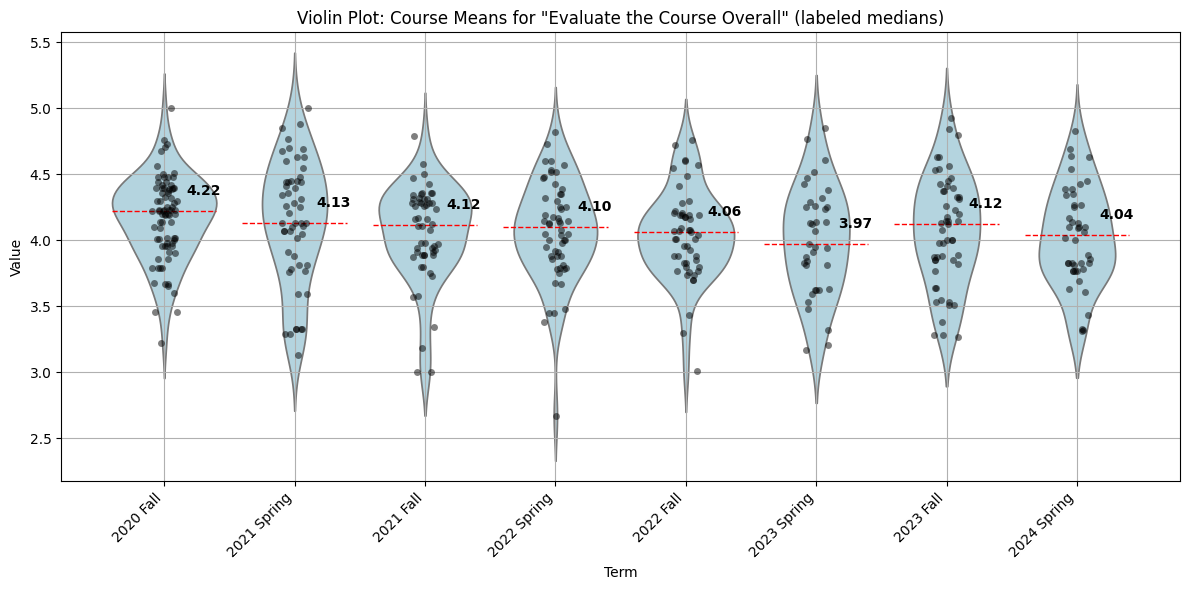

In [40]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_course_mean_data(json_data):
    course_mean_data = []

    for course in json_data:
        term = course.get("Term", "")
  
        # Remove 2019 data and handle 2024 data using Table_1
        if "2019" in term:
            continue

        general_feedback = course.get("Feedback", {})
        _g = general_feedback.get("General", [])
        
        # Check for Table_1 for data extraction
        if not _g:
            _g = general_feedback.get("Table_1", [])

        # Extract the Course Mean value from the general feedback data
        course_mean = next((item['Course Mean'] for item in _g if item.get('') == "Evaluate the course overall."), None)
        if course_mean:
            course_mean_data.append({'Term': term, 'Value': float(course_mean)})

    return course_mean_data

def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def custom_term_sort(term):
    try:
        year, semester = term.split()
        year = int(year)
    except ValueError:
        return (9999, '')
    
    semester_order = {"Spring": 0, "Fall": 1}
    
    return (year, semester_order.get(semester, 2))

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    # Ensure terms are sorted in chronological order
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique(), key=custom_term_sort), ordered=True)
    df = df.sort_values('Term')

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    # Calculate and plot median lines
    medians = df.groupby('Term')['Value'].median().sort_index()
    
    # Get the maximum y-value of the plot
    y_max = ax.get_ylim()[1]
    
    # Add a red line and position labels above each violin plot
    for i, term in enumerate(sorted(df['Term'].unique(), key=custom_term_sort)):
        median_value = medians[term]
        x_pos = i
        
        if median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            # Add label for median value with vertical and horizontal offset
            y_offset = 0.1  # Offset for clarity
            x_offset = 0.3  # Alternate x-offsets for clarity
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
course_mean_data = extract_course_mean_data(json_data)

# Compute statistics
df = pd.DataFrame(course_mean_data)
stats_summary = compute_statistics(df)
trend, r_value, p_value = analyze_trend(df)

# Print statistics and trend analysis
print("Statistics Summary:")
print(stats_summary)
print("\nTrend Analysis:")
print(f"Trend (Slope of Regression Line): {trend:.2f}")
print(f"R-squared: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value < 0.05 else 'No'}")

# Plot the graphics
plot_violin_plot(course_mean_data, 'Course Means for "Evaluate the Course Overall" (labeled medians)')


Statistics Summary:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.570741   4.630  4.63   1.33   
2021 Fall                 54.0  4.440370   4.495  4.47   1.35   
2021 Spring               53.0  4.510189   4.610  4.50   2.33   
2022 Fall                 51.0  4.396275   4.400  4.53   1.32   
2022 Spring               56.0  4.440000   4.470  4.40   2.26   
2023 Fall                 53.0  4.429057   4.430  4.73   1.43   
2023 Spring               37.0  4.408378   4.420  4.09   1.09   
2024 Spring               44.0  4.421818   4.445  4.00   1.26   

             Standard Deviation  
2020 Fall              0.292915  
2021 Fall              0.294900  
2021 Spring            0.462849  
2022 Fall              0.299786  
2022 Spring            0.379981  
2023 Fall              0.361244  
2023 Spring            0.305882  
2024 Spring            0.314534  

Trend Analysis:
Trend (Slope of Regression Line): -0.02
R-squared: 0.02
P-value: 0.0072

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/3779713147.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


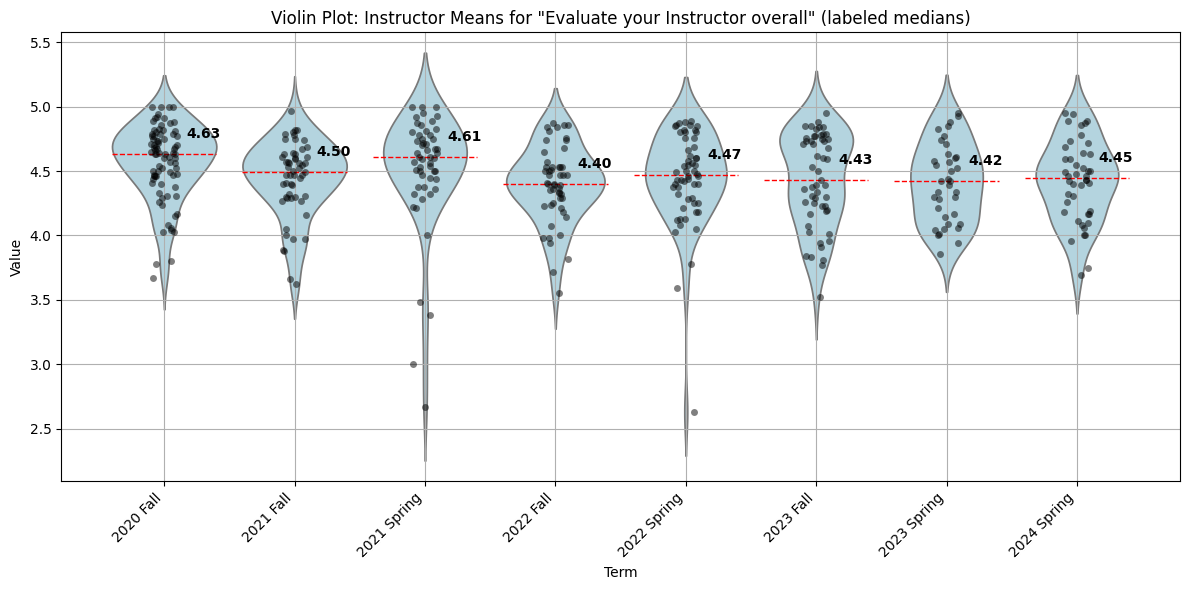

In [41]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_instructor_mean_data(json_data):
    instructor_mean_data = []

    for course in json_data:
        term = course.get("Term", "")

        if "2019" in term:
              continue

        instructor_feedback = course.get("Feedback", {})
        _hours_total = instructor_feedback.get("Instructor", [])
        if not _hours_total:
            _hours_total = instructor_feedback.get("Table_2", [])
        
        # Extract the Instructor Mean value from the instructor feedback data
        instructor_mean = next((item['Instructor Mean'] for item in _hours_total if item.get('') == "Evaluate your Instructor overall."), None)
        if instructor_mean:
            instructor_mean_data.append({'Term': term, 'Value': float(instructor_mean)})

    return instructor_mean_data

def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique()), ordered=True)
    df = df.sort_values('Term')

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    # Calculate and plot median lines
    medians = df.groupby('Term')['Value'].median().sort_index()
    
    # Add a red line for each violin plot
    for i, term in enumerate(sorted(df['Term'].unique())):
        median_value = medians[term]
        x_pos = i
        y_min, y_max = ax.get_ylim()
        
        if y_min <= median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            # Add label for median value with vertical and horizontal offset
            y_offset = 0.1 # Offset by 3% of the y-axis range
            x_offset = 0.3  # Alternate x-offsets for clarity
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
instructor_mean_data = extract_instructor_mean_data(json_data)

# Compute statistics
df = pd.DataFrame(instructor_mean_data)
stats_summary = compute_statistics(df)
trend, r_value, p_value = analyze_trend(df)

# Print statistics and trend analysis
print("Statistics Summary:")
print(stats_summary)
print("\nTrend Analysis:")
print(f"Trend (Slope of Regression Line): {trend:.2f}")
print(f"R-squared: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value < 0.05 else 'No'}")

# Plot the graphics
plot_violin_plot(instructor_mean_data, 'Instructor Means for "Evaluate your Instructor overall" (labeled medians)')


Statistics Summary:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.570741   4.630  4.63   1.33   
2021 Fall                 54.0  4.440370   4.495  4.47   1.35   
2021 Spring               53.0  4.510189   4.610  4.50   2.33   
2022 Fall                 51.0  4.396275   4.400  4.53   1.32   
2022 Spring               56.0  4.440000   4.470  4.40   2.26   
2023 Fall                 53.0  4.429057   4.430  4.73   1.43   
2023 Spring               37.0  4.408378   4.420  4.09   1.09   
2024 Spring               44.0  4.421818   4.445  4.00   1.26   

             Standard Deviation  
2020 Fall              0.292915  
2021 Fall              0.294900  
2021 Spring            0.462849  
2022 Fall              0.299786  
2022 Spring            0.379981  
2023 Fall              0.361244  
2023 Spring            0.305882  
2024 Spring            0.314534  

Trend Analysis:
Trend (Slope of Regression Line): -0.02
R-squared: 0.02
P-value: 0.0072

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/2658818239.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


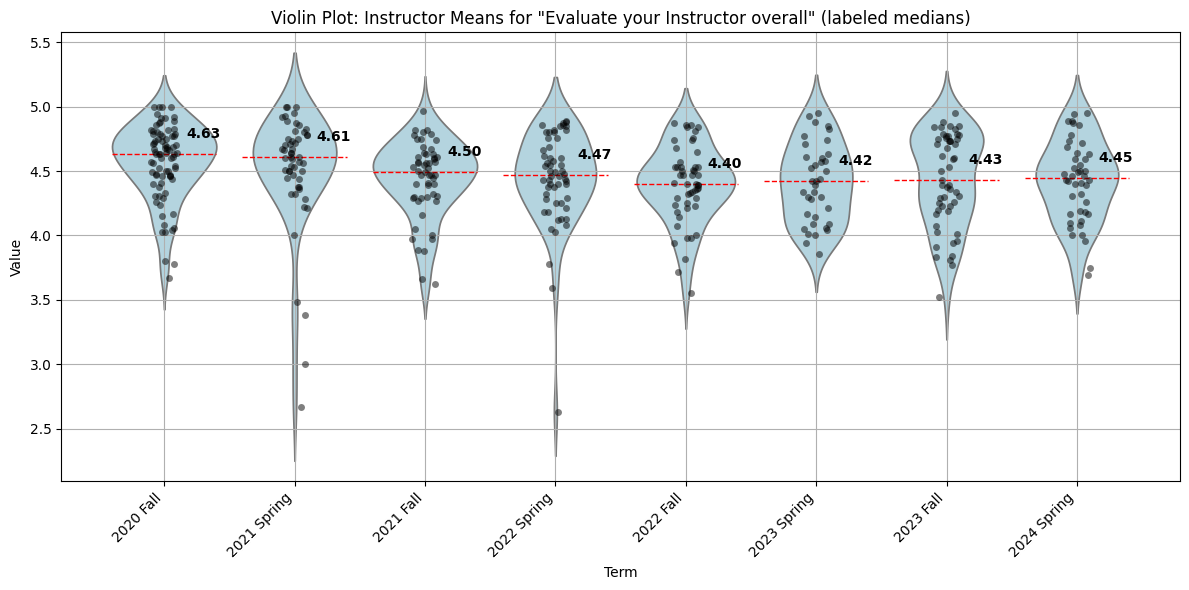

In [42]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_instructor_mean_data(json_data):
    instructor_mean_data = []

    for course in json_data:
        term = course.get("Term", "")

        # Remove 2019 data
        if "2019" in term:
            continue

        instructor_feedback = course.get("Feedback", {})
        _hours_total = instructor_feedback.get("Instructor", [])
        
        # Check for Table_2 for data extraction
        if not _hours_total:
            _hours_total = instructor_feedback.get("Table_2", [])
        
        # Extract the Instructor Mean value from the instructor feedback data
        instructor_mean = next((item['Instructor Mean'] for item in _hours_total if item.get('') == "Evaluate your Instructor overall."), None)
        if instructor_mean:
            instructor_mean_data.append({'Term': term, 'Value': float(instructor_mean)})

    return instructor_mean_data

def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def custom_term_sort(term):
    try:
        year, semester = term.split()
        year = int(year)
    except ValueError:
        return (9999, '')
    
    semester_order = {"Spring": 0, "Fall": 1}
    
    return (year, semester_order.get(semester, 2))

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    # Ensure terms are sorted in chronological order
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique(), key=custom_term_sort), ordered=True)
    df = df.sort_values('Term')

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    # Calculate and plot median lines
    medians = df.groupby('Term')['Value'].median().sort_index()
    
    # Add a red line for each violin plot
    for i, term in enumerate(sorted(df['Term'].unique(), key=custom_term_sort)):
        median_value = medians[term]
        x_pos = i
        y_min, y_max = ax.get_ylim()
        
        if y_min <= median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            # Add label for median value with vertical and horizontal offset
            y_offset = 0.1  # Offset for clarity
            x_offset = 0.3  # Alternate x-offsets for clarity
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
instructor_mean_data = extract_instructor_mean_data(json_data)

# Compute statistics
df = pd.DataFrame(instructor_mean_data)
stats_summary = compute_statistics(df)
trend, r_value, p_value = analyze_trend(df)

# Print statistics and trend analysis
print("Statistics Summary:")
print(stats_summary)
print("\nTrend Analysis:")
print(f"Trend (Slope of Regression Line): {trend:.2f}")
print(f"R-squared: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value < 0.05 else 'No'}")

# Plot the graphics
plot_violin_plot(instructor_mean_data, 'Instructor Means for "Evaluate your Instructor overall" (labeled medians)')


Statistics Summary:
             Number of Courses      Mean  Median  Mode  Range  \
2020 Fall                 81.0  4.302963   4.360  4.50   1.56   
2021 Fall                 54.0  4.267407   4.345  4.36   1.62   
2021 Spring               53.0  4.260189   4.360  3.40   1.46   
2022 Fall                 51.0  4.263333   4.200  4.13   1.16   
2022 Spring               56.0  4.268036   4.330  4.33   1.55   
2023 Fall                 53.0  4.257170   4.250  4.42   1.46   
2023 Spring               37.0  4.161622   4.170  3.68   1.65   
2024 Spring               44.0  4.240227   4.300  4.11   1.39   

             Standard Deviation  
2020 Fall              0.291730  
2021 Fall              0.310205  
2021 Spring            0.373237  
2022 Fall              0.242229  
2022 Spring            0.325730  
2023 Fall              0.332828  
2023 Spring            0.395710  
2024 Spring            0.339880  

Trend Analysis:
Trend (Slope of Regression Line): -0.01
R-squared: 0.01
P-value: 0.1005

/var/folders/wb/20xk_h351mv2vht4bf1sygh80000gn/T/ipykernel_62270/1212576471.py:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Term')['Value'].median().sort_index()


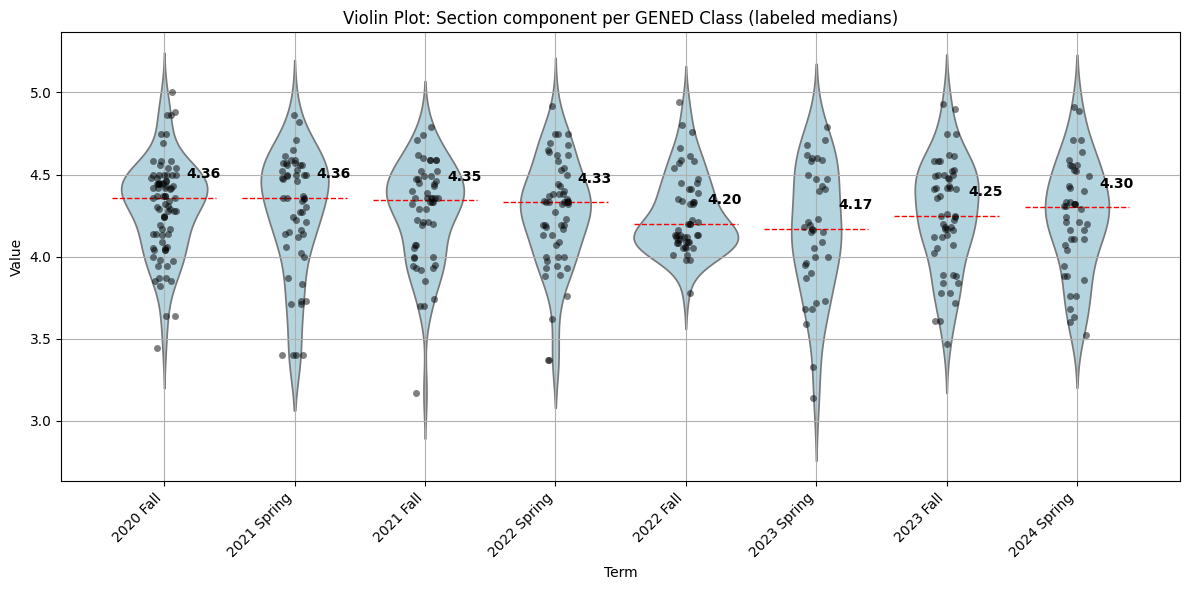

In [49]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_assignments_data(json_data):
    assignments_data = []

    for course in json_data:
        term = course.get("Term", "")

        if "2019" in term:
            continue
            
        assignments_feedback = course.get("Feedback", {})
        _a = assignments_feedback.get("General", [])
        if not _a:
            _a = assignments_feedback.get("Table_1", [])

        # Extract the Assignment Mean value from the assignments feedback data
        assignments_mean = next((item['Course Mean'] for item in _a if item.get('') == "Section component of the course"), None)
        if assignments_mean:
            assignments_data.append({'Term': term, 'Value': float(assignments_mean)})

    return assignments_data

def compute_statistics(df):
    stats_summary = {}
    
    for term, group in df.groupby('Term'):
        values = group['Value']
        
        stats_summary[term] = {
            'Number of Courses': len(values),
            'Mean': values.mean(),
            'Median': values.median(),
            'Mode': values.mode().values[0] if not values.mode().empty else None,
            'Range': values.max() - values.min(),
            'Standard Deviation': values.std()
        }
    
    return pd.DataFrame(stats_summary).T

def custom_term_sort(term):
    """ Custom function to sort terms chronologically. """
    try:
        year, semester = term.split()
        year = int(year)
    except ValueError:
        return (9999, '')  # Catch any errors with an arbitrary large year
    
    semester_order = {"Spring": 0, "Fall": 1}
    
    return (year, semester_order.get(semester, 2))  # Default to 2 for unknown semesters

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    # Ensure terms are sorted in chronological order
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique(), key=custom_term_sort), ordered=True)
    df = df.sort_values('Term')

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    # Calculate and plot median lines
    medians = df.groupby('Term')['Value'].median().sort_index()
    
    # Add a red line for each violin plot
    for i, term in enumerate(sorted(df['Term'].unique(), key=custom_term_sort)):
        median_value = medians[term]
        x_pos = i
        y_min, y_max = ax.get_ylim()
        
        if y_min <= median_value <= y_max:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            # Add label for median value with vertical and horizontal offset
            y_offset = 0.1  # Offset for clarity
            x_offset = 0.3  # Alternate x-offsets for clarity
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
assignments_data = extract_assignments_data(json_data)

# Compute statistics
df = pd.DataFrame(assignments_data)
stats_summary = compute_statistics(df)
trend, r_value, p_value = analyze_trend(df)

print("Statistics Summary:")
print(stats_summary)
print("\nTrend Analysis:")
print(f"Trend (Slope of Regression Line): {trend:.2f}")
print(f"R-squared: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value < 0.05 else 'No'}")

# Plot the graphics
plot_violin_plot(assignments_data, 'Section component per GENED Class (labeled medians)')


Statistics Summary:
            Value
count  447.000000
mean     4.100671
std      0.410638
min      2.370000
25%      3.850000
50%      4.140000
75%      4.380000
max      5.000000

Trend Analysis:
Trend (Slope of Regression Line): -0.02
R-squared: 0.02
P-value: 0.0046
Statistically Significant Trend: Yes


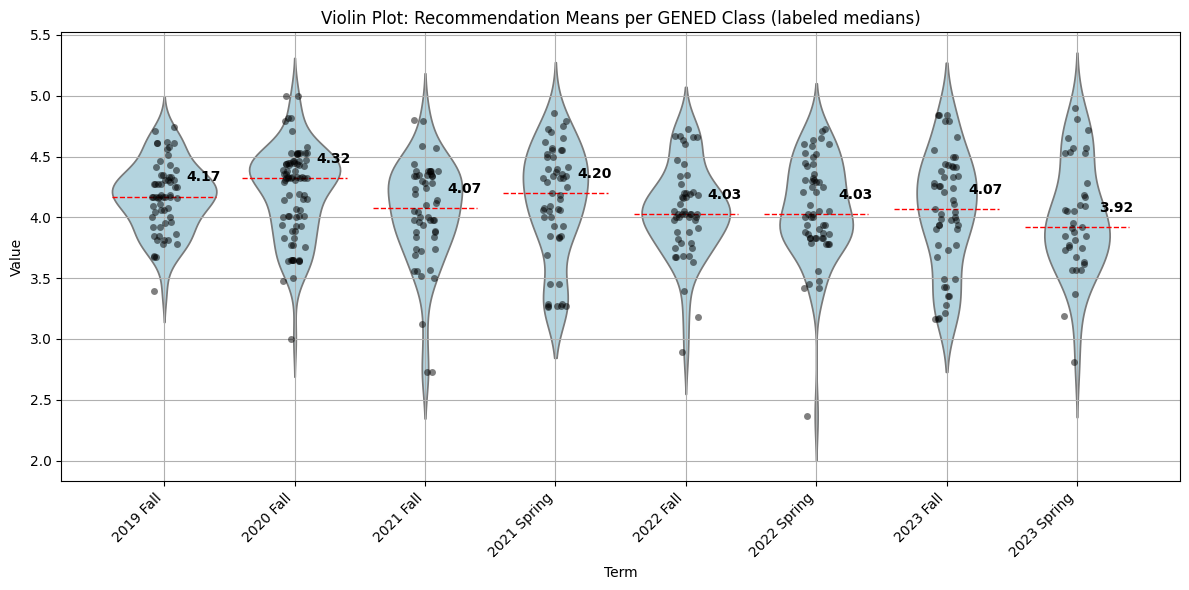

In [78]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def extract_recommendation_mean_data(json_data):
    recommendation_mean_data = []

    for course in json_data:
        term = course.get("Term", "")
        recommendation_stats = course.get("Feedback", {}).get("Recommendation_stats", [])

        # Extract the Mean value from the recommendation stats
        mean_value = next((item['Value'] for item in recommendation_stats if item['Statistics'] == "Mean"), None)
        if mean_value:
            recommendation_mean_data.append({'Term': term, 'Value': float(mean_value)})

    return recommendation_mean_data

def plot_violin_plot(data, title):
    df = pd.DataFrame(data)
    df['Term'] = pd.Categorical(df['Term'], categories=sorted(df['Term'].unique()), ordered=True)
    df = df.sort_values('Term')

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Term', y='Value', data=df, inner=None, color='lightblue')
    sns.stripplot(x='Term', y='Value', data=df, color='black', alpha=0.5, jitter=True)
    
    # Calculate and plot median lines
    medians = df.groupby('Term')['Value'].median().sort_index()
    
    # Get the minimum y-value of the plot
    y_min = ax.get_ylim()[0]
    
    # Add a red line and position labels at the bottom of each violin plot
    for i, term in enumerate(sorted(df['Term'].unique())):
        median_value = medians[term]
        x_pos = i
        
        if median_value >= y_min:
            plt.plot([x_pos - 0.4, x_pos + 0.4], [median_value, median_value], color='red', linestyle='--', linewidth=1)
            # Add label for median value with vertical and horizontal offset
            y_offset = 0.1 # Offset by 3% of the y-axis range
            x_offset = 0.3  # Alternate x-offsets for clarity
            plt.text(x_pos + x_offset, median_value + y_offset, f'{median_value:.2f}', color='black', fontsize=10, fontweight='bold', ha='center', va='bottom')
    
    plt.title(f'Violin Plot: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_trend(df):
    # Prepare the data for linear regression
    df = df.sort_values('Term')
    terms = df['Term'].astype('category').cat.codes.values.reshape(-1, 1)  # Convert terms to numeric codes
    values = df['Value'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(terms, values)
    
    trend = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(terms, values)
    
    # Calculate p-value for the trend
    _, p_value = stats.pearsonr(terms.flatten(), values)
    
    return trend, r_value, p_value

# Load the JSON file
with open('2020-2024_geneds_only_course_data.json', 'r') as file:
    json_data = json.load(file)

# Extract data
recommendation_mean_data = extract_recommendation_mean_data(json_data)

# Compute statistics
df = pd.DataFrame(recommendation_mean_data)
trend, r_value, p_value = analyze_trend(df)

# Print statistics and trend analysis
print("Statistics Summary:")
print(df.describe())
print("\nTrend Analysis:")
print(f"Trend (Slope of Regression Line): {trend:.2f}")
print(f"R-squared: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Trend: {'Yes' if p_value < 0.05 else 'No'}")

# Plot the graphics
plot_violin_plot(recommendation_mean_data, 'Recommendation Means per GENED Class (labeled medians)')
